**Basic EDA on web scraped job data from Naukri.com**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
file_path = '/content/naukri.xlsx'

In [85]:
# Setting it to display max rows.
#pd.set_option('display.max_rows',300)

# Assigning file to a dataframe
df = pd.read_excel(file_path)

# Removing 1st column from excel as it is not required
df = df.drop('Unnamed: 0', axis=1)

# Removing description column from excel as it is a full description
df = df.drop('Description', axis=1)

# Basic data transformation
df['Experience'] = df['Experience'].astype(str).str.replace(' Yrs', '')
df['Salary'] = df['Salary'].astype(str).str.replace(' Lacs PA','')
df['Salary'] = df['Salary'].astype(str).str.replace('Not disclosed','NA')
# Split 'Salary' column into 'Min' and 'Max'
df[['Min', 'Max']] = df['Salary'].str.split('-', expand=True)

import numpy as np

# Assuming 'Salary' is in the format 'Min - Max'
df[['Min', 'Max']] = df['Salary'].str.split('-', expand=True)

# Convert 'Min' and 'Max' columns to numeric types
df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
df['Max'] = pd.to_numeric(df['Max'], errors='coerce')

# Calculate the average salary where both 'Min' and 'Max' values are available
df['Average_Salary'] = np.where(df['Min'].notna() & df['Max'].notna(), (df['Min'] + df['Max']) / 2, np.nan)

# Convert 'Average Salary' to integer, rounding to the nearest whole number
df['Avg Calc'] = df['Average_Salary'].round().astype('Int64')
df['Average Salary'] = np.where(df['Avg Calc'].isna(), df['Salary'], df['Avg Calc'])
df['Average Salary'] = df['Average Salary'].astype(str)

In [86]:
df = df.drop(index=267)
df = df.drop(index=14)
df = df.drop(index=250)
df

,Company Name,Job Title,Experience,Salary,Location,Job Link,Tags,Posted,Min,Max,Average_Salary,Avg Calc,Average Salary
0,Virtusa,Data Analyst,8-13,NA,Hybrid - Hyderabad/Secunderabad,https://www.naukri.com/job-listings-data-analy...,"Data Analyst, Hive, Scala, Hadoop, Bigdata, Da...",30+ Days Ago,NaN,NaN,NaN,<NA>,NA
1,Ifood Web Media Technology,Data Analyst,4-7,NA,"Hybrid - Hyderabad/Secunderabad, Chennai, Bang...",https://www.naukri.com/job-listings-data-analy...,"Pivot Table, Vlookup, Vba & Macros, Macros, Hl...",20 Days Ago,NaN,NaN,NaN,<NA>,NA
2,KPI Partners,Data Analyst,5-10,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-data-analy...,"Analytical Skills, Data Analysis, Excel, Inspe...",30+ Days Ago,NaN,NaN,NaN,<NA>,NA
3,Batchservice,Data Analyst,5-6,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-data-analy...,"Product Management, Data Dictionary, Tableau, ...",24 Days Ago,NaN,NaN,NaN,<NA>,NA
4,Udacity,Data Analyst,1-3,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-data-analy...,"Cloud Computing, Data Management, Data Modelin...",24 Days Ago,NaN,NaN,NaN,<NA>,NA
5,Prudential Plc,Data Analyst,2-4,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-data-analy...,"Operations Research, Business Objects, Process...",25 Days Ago,NaN,NaN,NaN,<NA>,NA
6,Arcadis Consulting India Pvt. Ltd,Data Analyst - NA Mobility,2-5,NA,"Hyderabad/Secunderabad, Bangalore/Bengaluru",https://www.naukri.com/job-listings-data-analy...,"Qualitative Research, Process Automation, Rdbm...",30+ Days Ago,NaN,NaN,NaN,<NA>,NA
7,Arise Virtual Solutions,Data Analyst,4-5,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-data-analy...,"Bpo, Data Analysis, Service Level, Business Re...",30+ Days Ago,NaN,NaN,NaN,<NA>,NA
8,Printo Document Services Pvt. Ltd,Commercial Analyst / Data Analyst,1-4,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-commercial...,"Data Analysis, Data Analyst, Logistics, Commer...",28 Days Ago,NaN,NaN,NaN,<NA>,NA
9,Star4rall It Solutions,Payer Data Analyst,3-7,NA,"Hyderabad/Secunderabad, Kolkata, Mumbai, New D...",https://www.naukri.com/job-listings-payer-data...,"Health Insurance, Data Analysis, Claims, Proje...",30+ Days Ago,NaN,NaN,NaN,<NA>,NA


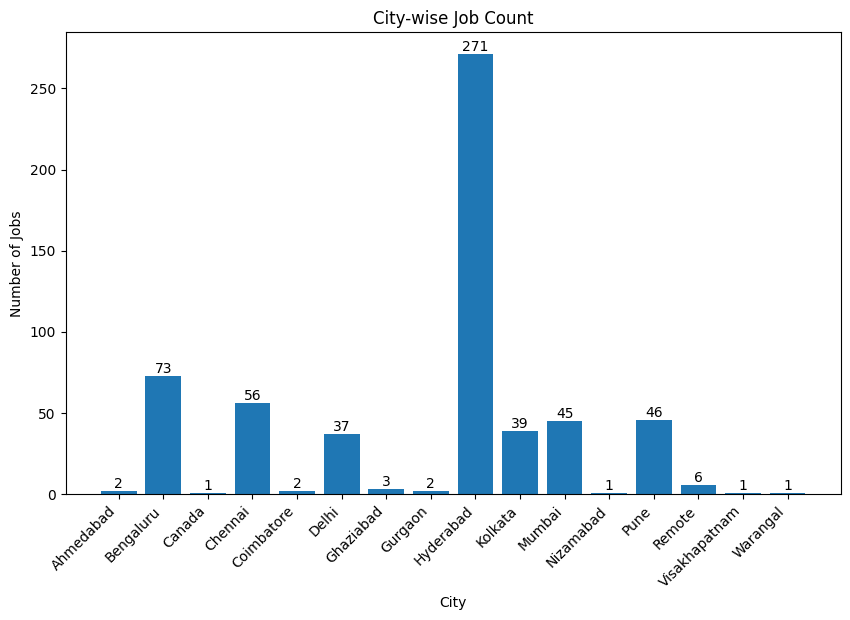

In [87]:
# Collected unique cities from excel file
cities = ['Ahmedabad', 'Bengaluru', 'Canada', 'Chennai', 'Coimbatore', 'Delhi', 'Ghaziabad', 'Gurgaon', 'Hyderabad', 'Kolkata', 'Mumbai', 'Nizamabad', 'Pune', 'Remote', 'Visakhapatnam', 'Warangal']

# Create columns for each city and initialize with 0
for city in cities:
    df[city] = df['Location'].apply(lambda x: 1 if city.lower() in str(x).lower() else 0)

# Calculate city-wise job count
city_counts = df[cities].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(city_counts.index, city_counts)

plt.title('City-wise Job Count')
plt.xlabel('City')
plt.ylabel('Number of Jobs')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

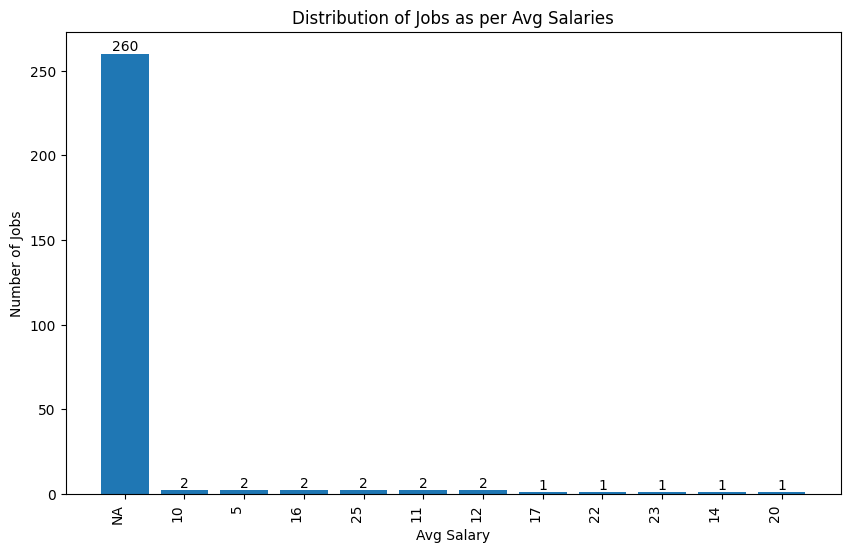

In [88]:
# Average Salaries vs No of Jobs
avg_counts = df['Average Salary'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_counts.index, avg_counts)
plt.title('Distribution of Jobs as per Avg Salaries')
plt.xlabel('Avg Salary')
plt.ylabel('Number of Jobs')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()